## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
# Modelling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')


#### Import the CSV Data as Pandas DataFrame

In [2]:
file_path = os.path.join('data', 'filtered_data.csv')
df = pd .read_csv(file_path)

#### Show Top 5 Records

In [3]:
df.head()

,Location,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,Status,Crime_Category,Hours_Occurred,Reported_Year,Reported_Month,Reported_Weekday,Occurred_Day,Occurred_Weekday,Modus_Operandi_num_code,Time_Difference_Log
0,4500 CARPENTER AV,34.1522,-118.3910,15,1563,1,75,M,W,101,...,IC,Property Crimes,18.000000,2020,3,0,6,4,1,4.290459
1,45TH ST,34.0028,-118.2391,13,1367,1,41,M,H,216,...,IC,Property Crimes,13.750000,2020,2,3,27,3,8,0.000000
2,600 E MARTIN LUTHER KING JR BL,34.0111,-118.2653,13,1343,2,67,M,B,501,...,IC,Property Crimes,6.083333,2020,8,4,21,4,2,0.000000
3,14900 ORO GRANDE ST,34.2953,-118.4590,19,1924,1,61,M,H,101,...,IC,Property Crimes,18.000000,2020,11,6,6,4,2,3.891820
4,7100 S VERMONT AV,33.9787,-118.2918,12,1245,1,0,X,X,401,...,IC,Property Crimes,11.500000,2020,2,1,25,1,6,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19903 entries, 0 to 19902
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 19903 non-null  object 
 1   Latitude                 19903 non-null  float64
 2   Longitude                19903 non-null  float64
 3   Area_ID                  19903 non-null  int64  
 4   Reporting_District_no    19903 non-null  int64  
 5   Part 1-2                 19903 non-null  int64  
 6   Victim_Age               19903 non-null  int64  
 7   Victim_Sex               19903 non-null  object 
 8   Victim_Descent           19903 non-null  object 
 9   Premise_Code             19903 non-null  int64  
 10  Weapon_Used_Code         19903 non-null  float64
 11  Status                   19903 non-null  object 
 12  Crime_Category           19903 non-null  object 
 13  Hours_Occurred           19903 non-null  float64
 14  Reported_Year         

### Convert already encoded labels into float

In [5]:
encoded_features=['Area_ID','Reporting_District_no','Part 1-2','Premise_Code','Weapon_Used_Code','Modus_Operandi_num_code']
df[encoded_features]=df[encoded_features].astype(int)

#### Preparing X and Y variables

In [6]:
X=df.drop('Crime_Category',axis=1)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19903 entries, 0 to 19902
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 19903 non-null  object 
 1   Latitude                 19903 non-null  float64
 2   Longitude                19903 non-null  float64
 3   Area_ID                  19903 non-null  int32  
 4   Reporting_District_no    19903 non-null  int32  
 5   Part 1-2                 19903 non-null  int32  
 6   Victim_Age               19903 non-null  int64  
 7   Victim_Sex               19903 non-null  object 
 8   Victim_Descent           19903 non-null  object 
 9   Premise_Code             19903 non-null  int32  
 10  Weapon_Used_Code         19903 non-null  int32  
 11  Status                   19903 non-null  object 
 12  Hours_Occurred           19903 non-null  float64
 13  Reported_Year            19903 non-null  int64  
 14  Reported_Month        

In [8]:
X.shape

(19903, 20)

In [9]:
y=df['Crime_Category']

In [10]:
y.value_counts()

Crime_Category
Property Crimes                  11626
Violent Crimes                    4740
Crimes against Public Order       1787
Fraud and White-Collar Crimes     1350
Crimes against Persons             225
Other Crimes                       175
Name: count, dtype: int64

In [11]:
crime_category=y.value_counts().index.tolist()
labels_map={}
for i in range(len(crime_category)):
    labels_map[crime_category[i]]=i
y=y.map(labels_map)

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Crime_Category, dtype: int64

In [13]:
num_features=X.select_dtypes(include='number').columns.tolist()
cat_features=X.select_dtypes(include='object').columns.tolist()
print(f'Categorical Features :{cat_features} \n\n Numerical Features:{num_features}')

numeric_transformer=StandardScaler()
categorical_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    transformers=
    [
        ('OneHotEncoder',categorical_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)
X=preprocessor.fit_transform(X)

Categorical Features :['Location', 'Victim_Sex', 'Victim_Descent', 'Status'] 

 Numerical Features:['Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code', 'Hours_Occurred', 'Reported_Year', 'Reported_Month', 'Reported_Weekday', 'Occurred_Day', 'Occurred_Weekday', 'Modus_Operandi_num_code', 'Time_Difference_Log']


In [14]:
X.shape

(19903, 12417)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y.values,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((15922, 12417), (3981, 12417))

In [16]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    cm = confusion_matrix(true, predicted)
    
    return accuracy, precision, recall, f1, cm

In [17]:

models = {
    'LogisticRegression': LogisticRegression(n_jobs=-1),
    'KNeighborsClassifier': KNeighborsClassifier(n_jobs=-1),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'XGBClassifier': XGBClassifier(n_jobs=-1),
    'CatBoostClassifier': CatBoostClassifier(verbose=False),
    'LGBMClassifier': LGBMClassifier(n_jobs=-1)
}

# List to store model names and accuracy scores
model_list = []
accuracy_score_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []

# Loop through each model in the dictionary
for model_name, model in models.items():
    print(model_name)
    
    if model_name in ['GaussianNB']:
        # Convert sparse matrix to dense using Truncated SVD for models that require dense arrays
        X_train_dense = X_train.toarray()
        X_test_dense =  X_test.toarray()
        model.fit(X_train_dense, y_train)

        # Predict on the dense training and test data
        y_train_pred = model.predict(X_train_dense)
        y_test_pred = model.predict(X_test_dense)
    else:
        # Use sparse matrices for models that can handle them
        model.fit(X_train, y_train)

        # Predict on the sparse training and test data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Evaluate model performance
    accuracy_train, precision_train, recall_train, f1_train, cm_train = evaluate_model(y_train, y_train_pred)
    accuracy_test, precision_test, recall_test, f1_test, cm_test = evaluate_model(y_test, y_test_pred)

    # Print model performance
    print('Model performance for Training set')
    print("- Accuracy Score : {:.4f}".format(accuracy_train))
    print("- Precision Score: {:.4f}".format(precision_train))
    print("- Recall Score : {:.4f}".format(recall_train))
    print("- f1 score: {:.4f}".format(f1_train))
    print(f"Confusion matrix \n \n{cm_train}")

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy Score : {:.4f}".format(accuracy_test))
    print("- Precision Score: {:.4f}".format(precision_test))
    print("- Recall Score : {:.4f}".format(recall_test))
    print("- f1 score: {:.4f}".format(f1_test))
    print(f"Confusion matrix \n \n{cm_test}")

    # Append results to lists
    model_list.append(model_name)
    accuracy_score_list.append(accuracy_test)
    precision_score_list.append(precision_test)
    recall_score_list.append(recall_test)
    f1_score_list.append(f1_test)

    print('='*35)
    print('\n')


LogisticRegression
Model performance for Training set
- Accuracy Score : 0.8632
- Precision Score: 0.8658
- Recall Score : 0.8632
- f1 score: 0.8504
Confusion matrix 
 
[[8768  415   40   53    3    0]
 [ 401 3389   14   15    2    0]
 [ 365  425  538   89    2    0]
 [ 102    6   15  959    0    0]
 [  27   62    5    8   85    0]
 [  89   10   14   16    0    5]]
----------------------------------
Model performance for Test set
- Accuracy Score : 0.7975
- Precision Score: 0.7835
- Recall Score : 0.7975
- f1 score: 0.7773
Confusion matrix 
 
[[2124  137   43   41    2    0]
 [ 130  770   14    1    4    0]
 [ 144  121   78   24    1    0]
 [  61    3    7  195    2    0]
 [   7   22    1    1    7    0]
 [  26    5    2    7    0    1]]


KNeighborsClassifier
Model performance for Training set
- Accuracy Score : 0.8453
- Precision Score: 0.8371
- Recall Score : 0.8453
- f1 score: 0.8295
Confusion matrix 
 
[[8747  343   85  103    0    1]
 [ 408 3372   23   17    1    0]
 [ 424  412  

In [18]:
pd.DataFrame(list(zip(model_list,accuracy_score_list,precision_score_list,recall_score_list,f1_score_list )), columns=['Model Name', 'accuracy score','precision score','recall score','f1 score']).sort_values(by=['accuracy score', 'precision score', 'recall score', 'f1 score'],ascending=False)

,Model Name,accuracy score,precision score,recall score,f1 score
8,LGBMClassifier,0.874152,0.869092,0.874152,0.870150
6,XGBClassifier,0.868626,0.861686,0.868626,0.863629
7,CatBoostClassifier,0.866616,0.855781,0.866616,0.858841
2,DecisionTreeClassifier,0.835217,0.831871,0.835217,0.833354
3,RandomForestClassifier,0.815122,0.802425,0.815122,0.780904
0,LogisticRegression,0.797538,0.783499,0.797538,0.777333
1,KNeighborsClassifier,0.794273,0.767668,0.794273,0.774596
4,AdaBoostClassifier,0.557146,0.775262,0.557146,0.599617
5,GaussianNB,0.206983,0.493523,0.206983,0.274931


# LGBMClassifier

In [19]:
LGB=LGBMClassifier()
LGB.fit(X_train,y_train)
# Predict classes and probabilities
y_pred = LGB.predict(X_test)
y_proba = LGB.predict_proba(X_test)


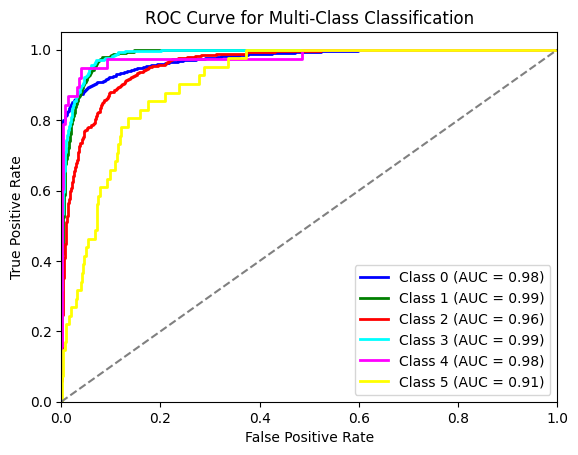

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


In [21]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[f'Class {i}' for i in range(6)]))


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.92      0.92      2347
     Class 1       0.84      0.92      0.88       919
     Class 2       0.72      0.66      0.69       368
     Class 3       0.76      0.79      0.78       268
     Class 4       0.72      0.61      0.66        38
     Class 5       0.29      0.05      0.08        41

    accuracy                           0.87      3981
   macro avg       0.71      0.66      0.67      3981
weighted avg       0.87      0.87      0.87      3981



### XGBClassifier

In [22]:
XGB=XGBClassifier(n_jobs=-1)
XGB.fit(X_train,y_train)
# Predict classes and probabilities
y_pred = XGB.predict(X_test)
y_proba = XGB.predict_proba(X_test)

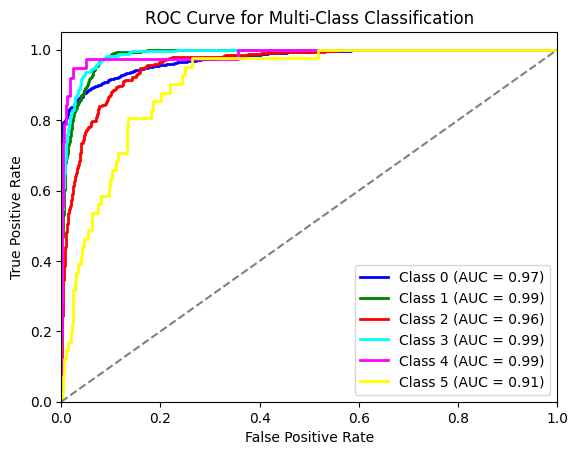

In [23]:
# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


In [24]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[f'Class {i}' for i in range(6)]))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.92      0.92      2347
     Class 1       0.83      0.90      0.87       919
     Class 2       0.70      0.62      0.66       368
     Class 3       0.78      0.79      0.78       268
     Class 4       0.67      0.58      0.62        38
     Class 5       0.25      0.02      0.04        41

    accuracy                           0.87      3981
   macro avg       0.69      0.64      0.65      3981
weighted avg       0.86      0.87      0.86      3981



### CatBoostClassifier

In [25]:
CAT=CatBoostClassifier(verbose=False)
CAT.fit(X_train,y_train)
# Predict classes and probabilities
y_pred = CAT.predict(X_test)
y_proba = CAT.predict_proba(X_test)

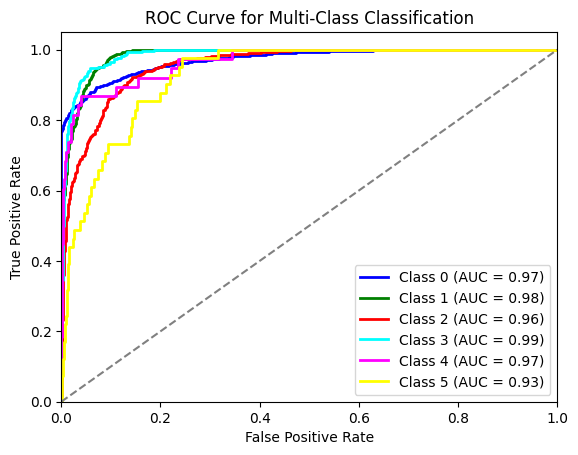

In [26]:
# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


In [27]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[f'Class {i}' for i in range(6)]))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.92      0.92      2347
     Class 1       0.81      0.93      0.87       919
     Class 2       0.75      0.58      0.66       368
     Class 3       0.80      0.78      0.79       268
     Class 4       0.68      0.34      0.46        38
     Class 5       0.00      0.00      0.00        41

    accuracy                           0.87      3981
   macro avg       0.66      0.59      0.61      3981
weighted avg       0.86      0.87      0.86      3981

